<a href="https://colab.research.google.com/github/raquelkimberly/predicciones-de-ventas-alimenticias/blob/main/Prediccion_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediccion de ventas 
Autor: Raquel Kimberly San Martín Saavedra


In [1]:
import pandas as pd
filename='/content/drive/MyDrive/CODIFICACION DOJO/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.shape

(8523, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#1era manera de realizar imputacion, analisis donde estan comentados algunos imputaciones ya que fue como en primera instancia antes de realizar los demas metodos
Observamos que las dos variables que posee datos nulos son peso del articulo que es una variable cuantitativa y el otro es el tamaño de salida que es una variable cualitativa, por ello viendo que no hay duplicados la opcion de eliminar no seria prudente ya que se perderia informacion, por ello con los conocimientos obtenidos la opcion para la variable cuantitativa seria reemplazar los nulls por la media y la cualitativa analizando su tipo es el tamaño de la tienda que es un dato que no se puede saber exactamente por ello lo dejamos de esa manera y los null poner no indica 


In [6]:
df.groupby('Item_Type')['Item_Weight'].median()

Item_Type
Baking Goods             11.650
Breads                   10.600
Breakfast                10.695
Canned                   12.150
Dairy                    13.350
Frozen Foods             12.850
Fruits and Vegetables    13.100
Hard Drinks              10.100
Health and Hygiene       12.150
Household                13.150
Meat                     12.350
Others                   14.500
Seafood                  11.650
Snack Foods              13.150
Soft Drinks              11.800
Starchy Foods            13.175
Name: Item_Weight, dtype: float64

In [7]:
#median_Item_Weight = df['Item_Weight'].median()
#df['Item_Weight'].fillna(median_Item_Weight, inplace=True)
#df.isna().sum()

In [8]:
#df_2=df['Outlet_Size'].isnull()
#df[df_2]

eliminamos la columna ya que no nos ayuda para nuestro modelo


In [9]:
#df['Outlet_Size'].fillna('No indica', inplace=True)
df=df.drop(columns = ['Outlet_Size']) 

In [10]:
#df.isna().sum()

In [11]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


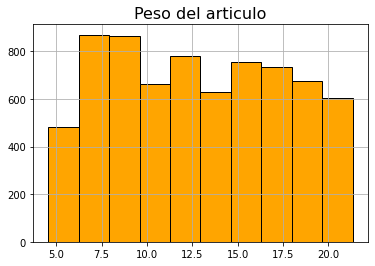

In [13]:
import matplotlib.pyplot as plt

df['Item_Weight'].hist(color='Orange',bins = 10,
                                   edgecolor='black')
plt.title('Peso del articulo', fontsize = 16)
plt.ticklabel_format(useOffset=False, style='plain')


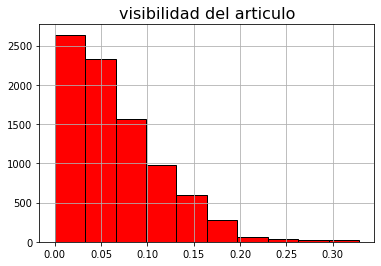

In [14]:
df['Item_Visibility'].hist(color='r',edgecolor='black')
plt.title('visibilidad del articulo', fontsize = 16)
plt.ticklabel_format(useOffset=False, style='plain')

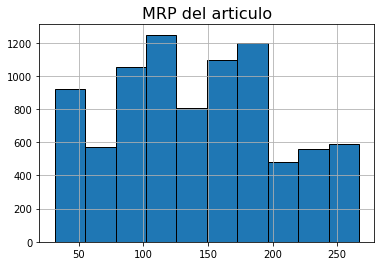

In [15]:
df['Item_MRP'].hist(edgecolor='black')
plt.title('MRP del articulo', fontsize = 16)
plt.ticklabel_format(useOffset=False, style='plain')

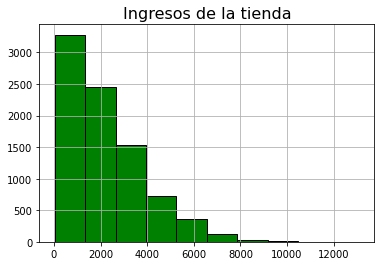

In [16]:
df['Item_Outlet_Sales'].hist(color='green',edgecolor='black')
plt.title('Ingresos de la tienda', fontsize = 16)
plt.ticklabel_format(useOffset=False, style='plain')

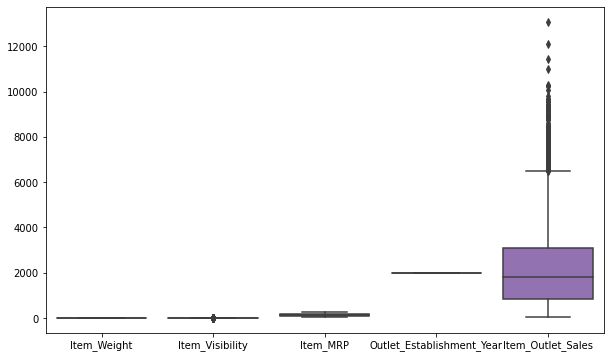

In [20]:
import seaborn as sns

df_boxplot = df.drop(['Item_Identifier','Item_Fat_Content','Item_Type',
                              'Outlet_Identifier','Outlet_Location_Type','Outlet_Type'], axis=1)
 
# New boxplot using stats_df
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot)
plt.show()

Podemos notar el grafico de cajas que tiene demasiados outliers lo que se puede suponer que sea por la gran variabilidad de los datos ya que se trata de dinero de diferentes ventas, posteriormente lo veremos con analisis más profundos

In [21]:
corr=df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


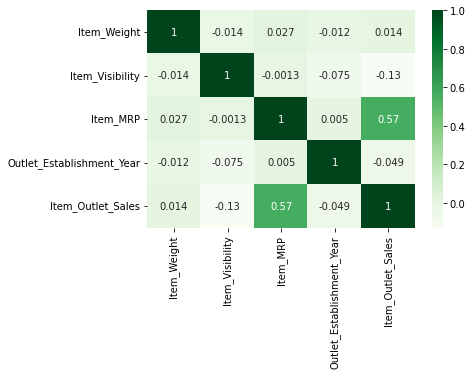

In [22]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [23]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
df_gro=df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()

In [25]:
df_descendente=df_gro.sort_values(ascending=False)

In [26]:
frecuencia_relativa = df_descendente.values.cumsum()
total_defectos = df_descendente.values.sum()
# frecuencia_relativa/total_defectos*100

In [27]:
df_2=frecuencia_relativa/total_defectos*100

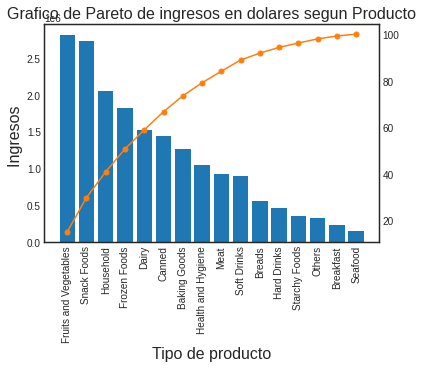

In [28]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots()
ax.bar(df_descendente.index, df_descendente.values, color="C0")

plt.bar(df_descendente.index, df_descendente.values)
ax.set_xlabel('Tipo de producto', fontsize = 16)
ax.set_ylabel('Ingresos ', fontsize = 16)
ax.set_title('Grafico de Pareto de ingresos en dolares segun Producto', fontsize = 16)
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(df_descendente.index, df_2, color="C1", marker="o", ms=5)


plt.show() 

Realice este grafico de pareto para resolver las dudas de nuestro cliente, sobre el producto que nos trae mas ingresos por lo que se ve que los 8 primeros productos representa el 80% de las ganancias, donde sera una opcion tratar de difundir los demas productos o poner la vista en los productos que nos generan mas ingresos


In [29]:
df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

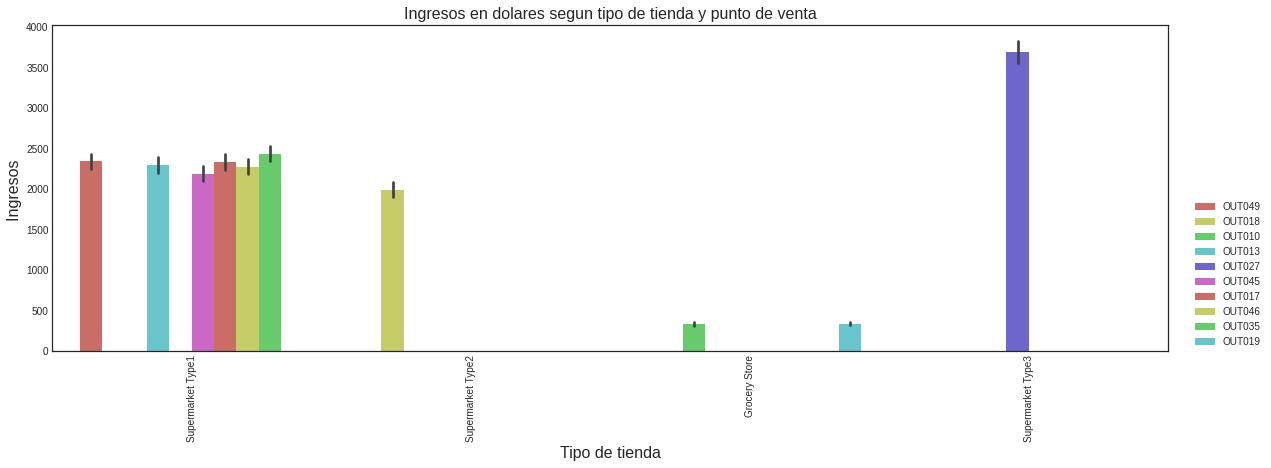

In [30]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20, 6))
palette = sns.color_palette("hls", 6)
sns.barplot(
    x='Outlet_Type',
    y='Item_Outlet_Sales',
    data=df,
    hue='Outlet_Identifier',
    palette = palette
)
plt.xlabel('Tipo de tienda', fontsize = 16)
plt.ylabel('Ingresos ', fontsize = 16)
plt.title('Ingresos en dolares segun tipo de tienda y punto de venta', fontsize = 16)
plt.xticks(rotation=90)
plt.legend(loc=(1.02,0))
plt.show()

En este Grafico tome como puntos de ventas el identificador de la tienda que nos indicaria que tienda seria podemos ver las diferentes tipos de tienda donde observamos que el supermarket 3 en el punto out027 nos indica unas ventas mayores a las demas, pero la supermarket type 1 que es la mayoria que tiene dentro del negocio

#2da manera de realizar (Pipelines)


In [31]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

Variables ordinales codificacion

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:

replacement_dictionary = {'Low Fat':0, 'Regular':1, 'reg':1, 'LF':0,'low fat':0}
df['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)
df['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64

Division y particionamiento de los datos

In [34]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [36]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [37]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [38]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [39]:

number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f35267af850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f35267afd00>)])

In [40]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f35267af850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f35267afd00>)])

In [41]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [42]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1588)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

In [43]:
# recombinen los conjuntos de entrenamiento y de prueba en el eje 1 (columnas)
X_train_processed = pd.DataFrame(X_train_processed)
X_train_processed .head()

,0,1,2,3,4,5,6,7,8,9,...,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587
0,0.817249,-0.740321,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-0.740321,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [44]:
X_test_processed = pd.DataFrame(X_test_processed)
X_test_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587
0,3.310089e-01,-0.740321,-0.776646,-0.998816,-1.293807,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.179892e+00,-0.740321,0.100317,-1.585194,-0.102145,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.784469e-01,1.350766,-0.482994,-1.595784,0.136187,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.213344e-16,1.350766,-0.415440,0.506592,-1.532139,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-6.426567e-01,1.350766,-1.047426,0.886725,0.732018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg = LinearRegression()

In [47]:
reg.fit(X_train_processed,y_train)

LinearRegression()

In [48]:
train_score = reg.score(X_train_processed,y_train)
print(train_score)

0.671661576961104


In [49]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

-4.546315656159815e+18


In [55]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [57]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

In [58]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [59]:
rmse_train,rmse_test

(985.7499779750012, 3541635446872.636)

2) La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.

In [61]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [62]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [64]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.21955244162710352


In [65]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [66]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [67]:
rmse_train, rmse_test

(6.157330131115108e-16, 1467.391252486868)

3) Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.

En general, ¿qué modelo recomiendan?
Justifiquen su recomendación.